[0, 11, 22, 33, 44]


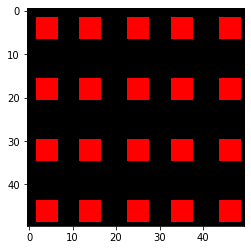

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from typing import Tuple, Set, List
from enum import Enum
from itertools import permutations, combinations_with_replacement
import math

cmap = matplotlib.colors.ListedColormap(['r', 'k'])
norm = matplotlib.colors.BoundaryNorm([0., 0.5, 1.], cmap.N)

def imshow(data, cmap, norm):
    plt.imshow(data, cmap=cmap, norm=norm, interpolation='none')

class RandomExclusionSet(object):
    def __init__(self, *, n_voids, size, depth, layer, rows):
        self.n_voids = n_voids
        self.size = size
        self.depth = depth
        self.layer = layer
        self.rows = rows
        self.cols = self.n_voids // self.rows
        
    def __len__(self):
        return self.n_voids * self.size
        
class IsotropicVoxelGrid(object):
    def __init__(
        self, 
        dataset_size: int,
        layers: int,
    ):
        self.dataset_size = dataset_size
        self.layers = layers
        
    def __call__(self, exclusions: [RandomExclusionSet]):
        self.grid = np.ones((self.layers, self.dataset_size, self.dataset_size))
        for exclusion in exclusions:
            self._apply_exclusion(exclusion)
        
    def _apply_exclusion(self, exclusion: RandomExclusionSet):
        # Evenly subdivide along y-axis
        y_axis_origins = np.linspace(
            exclusion.size + 1, 
            self.dataset_size-(exclusion.size + 1), 
            num=exclusion.rows
        ) if exclusion.rows > 1 else [math.ceil(self.dataset_size / 2)]

        centroids = []
        for row in range(exclusion.rows):
            x_axis_layout = np.linspace(
                exclusion.size + 1, 
                self.dataset_size - (exclusion.size + 1), 
                num=exclusion.cols
            )
            y_axis_val = y_axis_origins[row]

            for x_axis_val in x_axis_layout:
                centroids.append((int(x_axis_val), int(y_axis_val)))
        indices = []
        for centroid in centroids:
            indices.extend(self._construct_cube_indices(centroid, exclusion.layer, exclusion.depth, exclusion.size))

        self._set_shape_from_indices(indices)
        
    
    def _set_shape_from_indices(self, indices: List[Tuple[int, int, int]]):
        for index in indices:
            self.grid[index[0]][index[1]][index[2]] = 0
    
    def _construct_cube_indices(self, centroid: Tuple[int, int], layer: int, depth: int, size: int):
        indices = []

        for l in range(layer, layer + depth):
            cur_x = centroid[0]
            cur_y = centroid[1]
            for x in range(size):
                for y in range(size):
                    indices.append((l, cur_x + x, cur_y + y))
                    indices.append((l, cur_x - x, cur_y - y))
                    indices.append((l, cur_x - x, cur_y + y))
                    indices.append((l, cur_x + x, cur_y - y))
                
        indices = list(set(indices))
        return indices

isotropic_solver = IsotropicVoxelGrid(50, 50)
solver_sets = [
    RandomExclusionSet(n_voids=20, size=3, depth=5, layer=i, rows=5)
    for i in range(0, isotropic_solver.layers, 11)
]

print(solver_items)
isotropic_solver(solver_sets)
imshow(isotropic_solver.grid[0], cmap, norm)

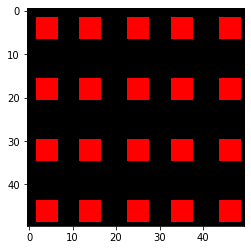

In [46]:
imshow(isotropic_solver.grid[11], cmap, norm)

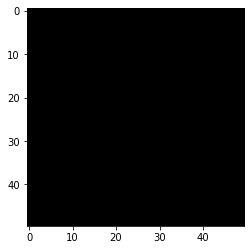

In [48]:
imshow(isotropic_solver.grid[16], cmap, norm)

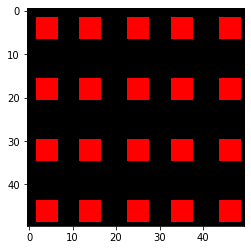

In [49]:
imshow(isotropic_solver.grid[45], cmap, norm)